In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, fetch_openml
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder


Plot the structure of a `DecisionTreeClassifier` of depth 2, trained on a the titanic dataset, for the report.

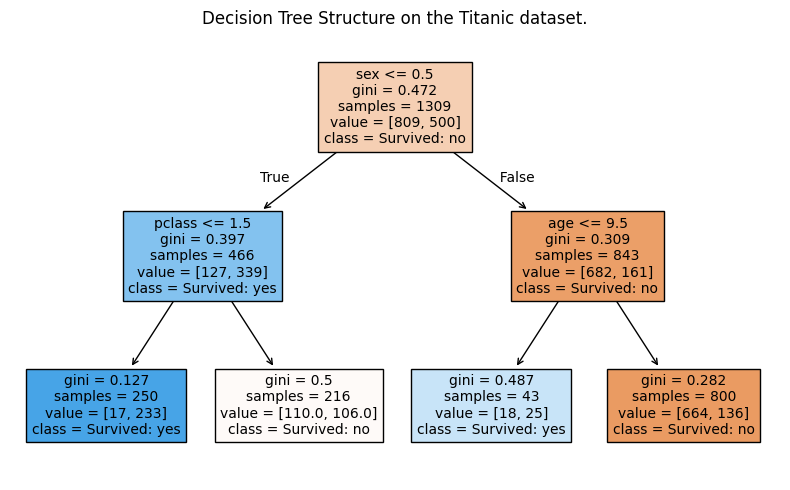

In [15]:
# Load the titanic dataset
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# Extract relevant features
categorical_columns = ["pclass", "sex", "embarked"]
numerical_columns = ["age", "sibsp", "parch", "fare"]

X = X[categorical_columns + numerical_columns]

# Preprocess the features
categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1
)
numerical_pipe = SimpleImputer(strategy="mean")

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

# Train decision tree
dt = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", DecisionTreeClassifier(max_depth=2, random_state=42)),
    ]
)
dt.fit(X, y)

# Plot Tree structure
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
plot_tree(dt[-1], ax=ax1, feature_names=categorical_columns+numerical_columns,
          class_names=['Survived: no', 'Survived: yes'], filled=True,
          fontsize=10, impurity=True)
ax1.set_title('Decision Tree Structure on the Titanic dataset.')

plt.tight_layout()
plt.show()

Plot the decision function and structure of a `DecisionTreeClassifier` of depth 2, trained on a 2D `make_classification`, for the oral defense material.

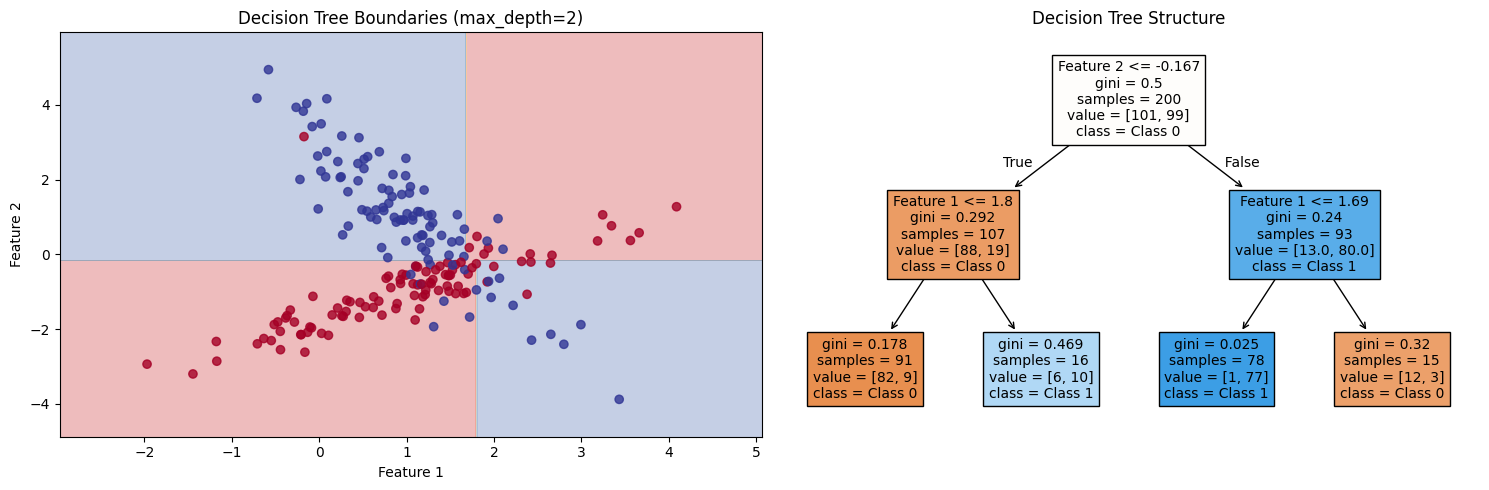

Tree depth: 2
Number of leaves: 4
Training accuracy: 0.905


In [ ]:
# Generate 2D dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                          n_informative=2, n_clusters_per_class=1)

# Train decision tree on full dataset for visualization consistency
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X, y)

# Create mesh for decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Decision boundaries
ax1.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
scatter = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', alpha=0.8)
ax1.set_title('Decision Tree Boundaries (max_depth=2)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot 2: Tree structure
plot_tree(dt, ax=ax2, feature_names=['Feature 1', 'Feature 2'],
          class_names=['Class 0', 'Class 1'], filled=True,
          fontsize=10, impurity=True)
ax2.set_title('Decision Tree Structure')

plt.tight_layout()
plt.show()

# Print tree info
print(f"Tree depth: {dt.get_depth()}")
print(f"Number of leaves: {dt.get_n_leaves()}")
print(f"Training accuracy: {dt.score(X, y):.3f}")